# Segmenting Soft Tissue Sarcomas
--------

## Loading data

In [1]:
// Load libraries
np:.p.import`numpy
plt:.p.import`matplotlib.pyplot
h5py:.p.import`h5py

C:\Users\glim\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [1]:
//Load data
data:((2#"I"),(8#"*"),(6#"I"),"*";enlist",")0:`:study_list.csv
5#data:`index`age`grade`histype`mskcc`outcome`id`sex`site`status`date`time`daysPET`daySCAN`daysDiag`daysout`treatement xcol data

// patient_images_lowres.h5
ctdata:h5py[`:File]["patient_images_lowres.h5";`r]

// lab_petct_vox_5.00mm.h5
pdata:h5py[`:File]["lab_petct_vox_5.00mm.h5";`r]

[0;31mstudy_list.csv. OS reports: The system cannot find the file specified.[0m: [0;31mstudy_list.csv. OS reports: The system cannot find the file specified.[0m

In [3]:
pylist:.p.import[`builtins;`:list]
imagesct:{np[`:array;<]pylist[[ctdata[@;`ct_data][`:values][]]][@;x]}each til count data
idsct:{np[`:array;<]pylist[[ctdata[@;`ct_data][`:keys][]]][@;x]}each til count data

shape:{-1_count each first scan x} 
shape imagesct

18 134 256 256


## MIP data

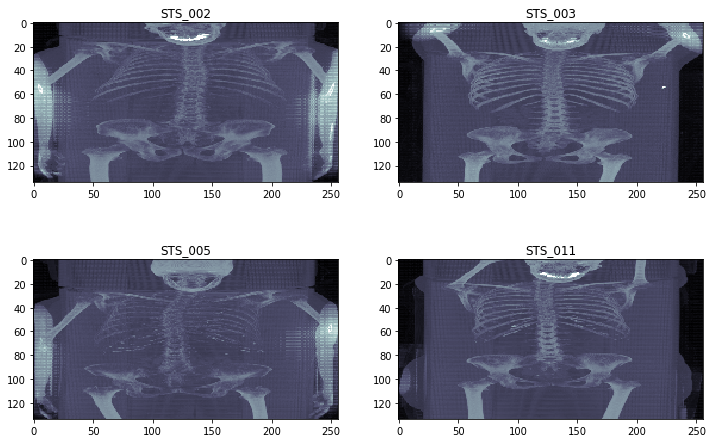

In [4]:
mip:{reverse max each x}each imagesct

// Plot first 4
ax:plt[`:subplots;2;2;`figsize pykw 12 8][@;1]

{[ax;mip;ids;i]
    axbox:ax[@;floor i%2][@;i mod 2];
    axbox[`:imshow][mip i;`cmap pykw `bone];
    axbox[`:set_title]ids i;
 }[ax;mip;idsct]each til 4;

## Radiography

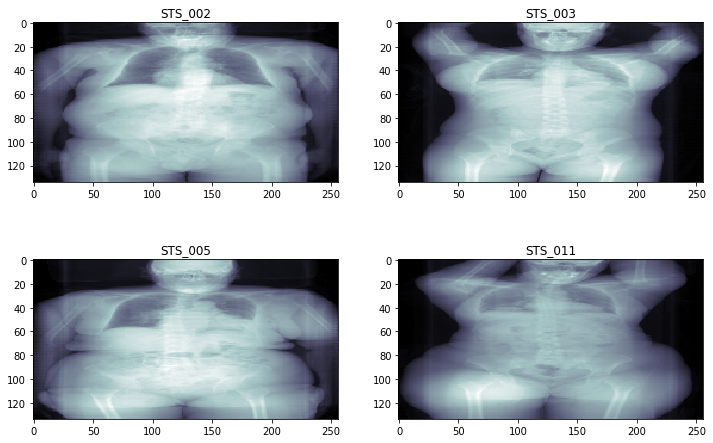

In [5]:
rad:{reverse sum each x}each imagesct

// Plot first 4
ax:plt[`:subplots;2;2;`figsize pykw 12 8][@;1]

{[ax;rad;ids;i]
    axbox:ax[@;floor i%2][@;i mod 2];
    axbox[`:imshow][rad i;`cmap pykw `bone];
    axbox[`:set_title]ids i;
 }[ax;rad;idsct]each til 4;

## PET view

In [6]:
n:count pylist[[pdata[@;`pet_data][`:values][]]]`
imagespet:{np[`:array;<]pylist[[pdata[@;`pet_data][`:values][]]][@;x]}each til n
idspet:{np[`:array;<]pylist[[pdata[@;`pet_data][`:keys][]]][@;x]}each til n

shape imagespet

7 175 100 100


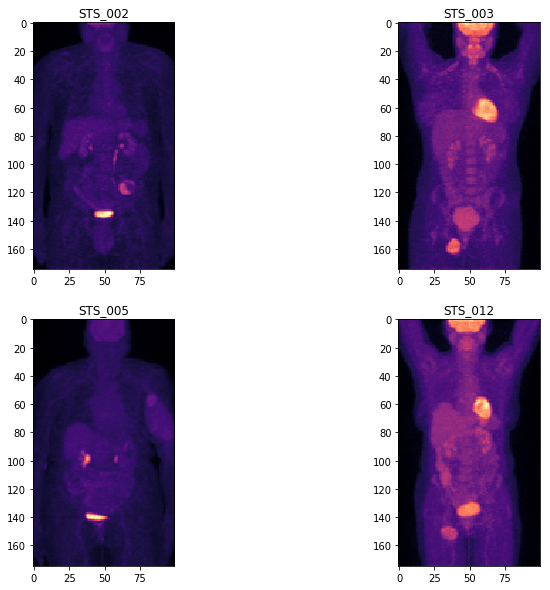

In [7]:
pet:{reverse sqrt max each x}each imagespet

// Plot first 4
ax:plt[`:subplots;2;2;`figsize pykw 12 10][@;1]

{[ax;pet;ids;i]
    axbox:ax[@;floor i%2][@;i mod 2];
    axbox[`:imshow][pet i;`cmap pykw `magma];
    axbox[`:set_title]ids i;
 }[ax;pet;idspet]each til 4;